In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_metric_stats.csv")
df.head()

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,n_housing,total,n_unmarried_households,n_male_male_couple,n_male_female_couple,n_female_female_couple,n_female_male_couple,n_other_household,percent_obese_fem,percent_obese_male
0,"Aberdeen, SD Micro Area",1520.0,904.0,391.0,53.0,536.0,739.0,1148.0,612.0,367.0,...,20075.0,17747.0,1053.0,56.0,440.0,4.0,553.0,16694.0,33.1,34.6
1,"Aberdeen, WA Micro Area",1952.0,1656.0,1133.0,36.0,505.0,761.0,1301.0,990.0,588.0,...,36273.0,28263.0,2715.0,8.0,1196.0,12.0,1499.0,25548.0,36.1,34.8
2,"Abilene, TX Metro Area",7241.0,3986.0,2673.0,1010.0,2434.0,2444.0,5633.0,2715.0,1260.0,...,71513.0,60394.0,3670.0,59.0,1562.0,84.0,1965.0,56724.0,27.2,26.1
3,"Ada, OK Micro Area",1368.0,847.0,455.0,122.0,509.0,639.0,1331.0,606.0,295.0,...,16881.0,14354.0,773.0,10.0,374.0,22.0,367.0,13581.0,30.7,31.4
4,"Adrian, MI Micro Area",3007.0,2219.0,1456.0,235.0,715.0,1175.0,2638.0,1465.0,805.0,...,43806.0,38222.0,2770.0,17.0,1384.0,47.0,1322.0,35452.0,37.5,36.6


In [7]:
df["p_hapa"] = df["n_hapa"] / df["n_people"]
df["p_white"] = df["n_white"] / df["n_people"]
df["p_black"] = df["n_black"] / df["n_people"]

In [8]:
df.to_csv("final_metric_stats.csv", index=False)

# Metrics

* p_unmarried_20_24_female (higher the better)
* m_f_income_ratio (lower the better - indicates men are broke)
* p_gay (higher the better)

### Still need to calculate
* p_white
* p_cuban
* p_hapa
* p_black (lowwww lol)
* median rent
* p_white_unmarried

### Still need to think about
* female obesity (lower the better)
* male obesity (higher the better)
* obesity ratio?

# Metric importance

1. p_unmarried_20_24_female (positive)
2. m_f_income_ratio (negative - want lower male income and higher female income)
3. m_f obesity ratio (positive - want higher male obesity and lower female obesity)
4. median rent (negative)
5. p_black (negative)

I think I don't really care about overall female obesity. doesn't matter if a girl is attractive if i can't approach her. 

Anyway I also have to write some code to calculate an efficient frontier. fuck.

In [9]:
for col in df.columns:
    print(col)

area_name
n_unmarried_males_20_24
n_unmarried_males_25_29
n_unmarried_males_30_34
n_married_males_20_24
n_married_males_25_29
n_married_males_30_34
n_unmarried_females_20_24
n_unmarried_females_25_29
n_unmarried_females_30_34
n_married_females_20_24
n_married_females_25_29
n_married_females_30_34
n_males_middle_school_dropout
n_males_high_school_dropout
n_males_ged
n_males_college_dropout
n_males_associates
n_males_bachelors
n_males_grad
n_females_middle_school_dropout
n_females_high_school_dropout
n_females_ged
n_females_college_dropout
n_females_associates
n_females_bachelors
n_females_grad
n_households
n_white_households
n_black_households
n_amerindian_households
n_asian_households
n_islander_households
n_mixed_households
n_hispanic_households
median_income_males_living_alone
median_income_females_living_alone
p_male_disabled
p_female_disabled
p_white_disabled
p_black_disabled
p_amerindian_disabled
p_asian_disabled
p_hawaiian_disabled
p_nonhisp_white_disabled
p_hispanic_disabled
p_d

In [10]:
from tqdm import tqdm

def efficient_frontier_finder(df, metric_dict):
    """
    a point X is on the efficient frontier if DNE point Y st
    (metric(X) <= metric(Y) for all metrics)
    
    ideas:
    * N^2: for each point X, try and find Y that is at least as good on all metrics. if so, X is not efficient.
    * construct the convex hull in one go
    """
    metric_items = metric_dict.items()
    metric_cols, metric_signs = list(zip(*metric_dict.items()))
    metric_cols = np.array(metric_cols)
    metric_signs = np.array(metric_signs, dtype=int)
    assert len(metric_cols) == len(metric_signs)
    efficient_inds = []
    for i, rowi in tqdm(df.iterrows()):
        if not rowi[metric_cols].isnull().any():
            # find Y that is at least as good on all metrics
            metric_diffs = (df[metric_cols] - rowi[metric_cols]) * metric_signs
            y_not_worse = (metric_diffs >= 0).all(axis=1)
            #y_not_worse = ((metric_diffs >= 0) & ~metric_diffs.isnull()).all(axis=1)
            if y_not_worse.sum() == 1: # will always match w itself
                efficient_inds.append(i)
    return df.loc[efficient_inds]
            
efficient_points = efficient_frontier_finder(df, {"p_unmarried_20_24_female": 1, "n_people":1})
efficient_points

1005it [00:02, 466.79it/s]


,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,percent_obese_male,p_unmarried_20_24_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
96,"Bloomsburg-Berwick, PA Metro Area",3468.0,1672.0,1123.0,137.0,663.0,1069.0,4094.0,1250.0,789.0,...,29.6,0.541391,626.0,8494.0,1.393186,0.021338,0.1,0.001584,0.948627,0.017922
104,"Boston-Cambridge-Newton, MA-NH Metro Area",166502.0,152604.0,87730.0,2873.0,27701.0,74246.0,163707.0,135732.0,72770.0,...,22.1,0.495768,-2795.0,12829.0,1.358833,0.036654,1.0,0.008015,0.760209,0.083332
159,"Charlottesville, VA Metro Area",7792.0,5125.0,3291.0,324.0,1900.0,3216.0,8168.0,5295.0,2699.0,...,20.6,0.511779,376.0,-58.0,0.998586,0.022727,-1.3,0.007705,0.797842,0.119980
245,"Durham-Chapel Hill, NC Metro Area",22085.0,17173.0,10497.0,767.0,4837.0,9268.0,22823.0,16428.0,9489.0,...,29.5,0.508217,738.0,4604.0,1.138524,0.031042,-4.8,0.006488,0.624929,0.265609
293,"Florence, SC Metro Area",5776.0,4360.0,2769.0,283.0,1662.0,2493.0,6065.0,4799.0,2936.0,...,31.4,0.512203,289.0,5275.0,1.250832,0.008521,-2.1,0.002599,0.546073,0.422088
347,"Greenville, NC Metro Area",10306.0,4693.0,2154.0,259.0,1581.0,2552.0,11937.0,4680.0,2214.0,...,34.6,0.536663,1631.0,2147.0,1.087248,0.012322,-2.3,0.006294,0.572131,0.347043
521,"Marion, IN Micro Area",2280.0,1321.0,704.0,144.0,471.0,488.0,2928.0,1060.0,661.0,...,32.7,0.562212,648.0,9092.0,1.413592,0.026164,-0.4,0.001821,0.878228,0.072398
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",585877.0,582929.0,366543.0,14529.0,101879.0,262950.0,568225.0,525463.0,312391.0,...,18.3,0.492352,-17652.0,13833.0,1.409588,0.044307,-1.0,0.006840,0.575429,0.173251
633,"Orlando-Kissimmee-Sanford, FL Metro Area",80501.0,75360.0,45049.0,3559.0,19351.0,36193.0,79613.0,62263.0,36424.0,...,31.3,0.497227,-888.0,8327.0,1.291184,0.041526,-0.8,0.005527,0.697271,0.165791
667,"Pierre, SD Micro Area",382.0,543.0,196.0,0.0,117.0,392.0,597.0,395.0,307.0,...,24.3,0.609806,215.0,6027.0,1.185795,0.000000,0.1,0.000873,0.851055,0.001164


In [27]:
trim_df = df.query("n_people > 150000")
metric_dict = {
    "p_unmarried_20_24_female": 1, # more unmarried women per unmarried man
    #"m_f_income_ratio": -1, # rich male bad, rich female good
    "m_f_obesity_diff": 1, # more fat guys than fat girls
    #"median_rent_1_bed": -1, # low rent
    #"p_hapa": 1, # lol
    #"p_white_unmarried": 1,
    "p_white": 1,
    #"p_black": -1,
}

eff_df = efficient_frontier_finder(trim_df, metric_dict)
eff_df.sort_values("median_rent_1_bed", ascending=True)

286it [00:00, 560.94it/s]


,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,percent_obese_male,p_unmarried_20_24_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
444,"Kingsport-Bristol, TN-VA Metro Area",7260.0,4929.0,2673.0,924.0,3262.0,4192.0,5798.0,3757.0,1920.0,...,35.4,0.444019,-1462.0,5136.0,1.235607,NaN,1.7,0.001876,0.950145,0.018447
840,"Terre Haute, IN Metro Area",7211.0,4312.0,2586.0,622.0,1780.0,2736.0,6665.0,2680.0,1234.0,...,35.6,0.480326,-546.0,7093.0,1.314211,0.029986,3.0,0.003815,0.906462,0.045803
897,"Waterloo-Cedar Falls, IA Metro Area",7951.0,3724.0,1850.0,529.0,1761.0,2694.0,8067.0,2712.0,1687.0,...,35.6,0.503621,116.0,9331.0,1.345260,0.022819,-0.5,0.002831,0.865767,0.075704
347,"Greenville, NC Metro Area",10306.0,4693.0,2154.0,259.0,1581.0,2552.0,11937.0,4680.0,2214.0,...,34.6,0.536663,1631.0,2147.0,1.087248,0.012322,-2.3,0.006294,0.572131,0.347043
334,"Grand Junction, CO Metro Area",4150.0,3555.0,1549.0,473.0,1201.0,2947.0,3901.0,1835.0,1396.0,...,27.8,0.484536,-249.0,9322.0,1.358401,0.021192,-0.4,0.004484,0.940120,0.006745
250,"Eau Claire, WI Metro Area",7438.0,3817.0,2296.0,202.0,1652.0,3179.0,7349.0,2772.0,1511.0,...,28.1,0.496991,-89.0,10515.0,1.407653,0.012141,1.4,0.003279,0.930809,0.013757
127,"Burlington, NC Metro Area",4656.0,3059.0,1917.0,277.0,1558.0,2405.0,5030.0,2844.0,2019.0,...,35.0,0.519306,374.0,3003.0,1.113061,0.031292,-2.0,0.002180,0.697711,0.195476
466,"Laredo, TX Metro Area",9871.0,5833.0,3607.0,626.0,2935.0,3979.0,8981.0,4390.0,3069.0,...,27.6,0.476395,-890.0,15607.0,1.932095,0.011122,0.5,0.000344,0.958753,0.004442
717,"Roanoke, VA Metro Area",7793.0,6001.0,3990.0,568.0,2752.0,4630.0,8074.0,5371.0,3091.0,...,27.0,0.508855,281.0,4909.0,1.178789,0.023942,0.4,0.003990,0.808526,0.131798
60,"Bangor, ME Metro Area",5434.0,3882.0,2163.0,193.0,1353.0,2261.0,4516.0,3111.0,1733.0,...,35.5,0.453869,-918.0,2864.0,1.133433,0.022019,0.9,0.004171,0.945254,0.008506


In [13]:
trim_df[["p_white_unmarried", "p_black_unmarried", "p_asian_unmarried"]]

,p_white_unmarried,p_black_unmarried,p_asian_unmarried
2,28.7,53.8,31.2
5,35.2,36.4,17.9
6,30.6,50.6,32.2
10,33.2,57.1,37.2
14,32.0,42.7,26.8
...,...,...,...
929,30.6,47.5,27.0
932,26.6,47.2,28.1
933,27.7,53.7,35.3
934,27.6,31.5,23.2


In [15]:
trim_df["p_black"].describe()

count    286.000000
mean       0.113007
std        0.103725
min        0.003140
25%        0.032276
50%        0.076247
75%        0.161109
max        0.504153
Name: p_black, dtype: float64

<AxesSubplot:xlabel='p_unmarried_20_24_female', ylabel='p_black'>

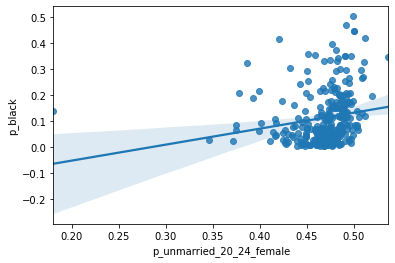

In [16]:
sns.regplot(x="p_unmarried_20_24_female", y="p_black", data=trim_df)

In [17]:
metric_cols = ["p_unmarried_20_24_female", "p_white_unmarried", "m_f_income_ratio", "m_f_obesity_diff", "p_white"]
display(trim_df[["area_name", *metric_cols]].loc[trim_df["area_name"].str.contains("Portland")])
trim_df[metric_cols].median()

,area_name,p_unmarried_20_24_female,p_white_unmarried,m_f_income_ratio,m_f_obesity_diff,p_white
685,"Portland-South Portland, ME Metro Area",0.481558,28.3,1.176416,-0.2,0.934521
686,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",0.481951,30.3,1.223328,-1.3,0.811246


p_unmarried_20_24_female     0.474272
p_white_unmarried           28.700000
m_f_income_ratio             1.272944
m_f_obesity_diff            -0.700000
p_white                      0.796590
dtype: float64

In [18]:
trim_df.sort_values("p_white", ascending=False).iloc[0:30]

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,percent_obese_male,p_unmarried_20_24_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
466,"Laredo, TX Metro Area",9871.0,5833.0,3607.0,626.0,2935.0,3979.0,8981.0,4390.0,3069.0,...,27.6,0.476395,-890.0,15607.0,1.932095,0.011122,0.5,0.000344,0.958753,0.004442
444,"Kingsport-Bristol, TN-VA Metro Area",7260.0,4929.0,2673.0,924.0,3262.0,4192.0,5798.0,3757.0,1920.0,...,35.4,0.444019,-1462.0,5136.0,1.235607,NaN,1.7,0.001876,0.950145,0.018447
391,"Huntington-Ashland, WV-KY-OH Metro Area",10841.0,6899.0,4252.0,871.0,3199.0,4562.0,9677.0,5212.0,2850.0,...,34.8,0.471635,-1164.0,5367.0,1.264776,0.018528,-0.2,0.002120,0.947506,0.023699
60,"Bangor, ME Metro Area",5434.0,3882.0,2163.0,193.0,1353.0,2261.0,4516.0,3111.0,1733.0,...,35.5,0.453869,-918.0,2864.0,1.133433,0.022019,0.9,0.004171,0.945254,0.008506
476,"Lebanon, NH-VT Micro Area",6801.0,4949.0,3051.0,296.0,1102.0,2802.0,5951.0,4191.0,2331.0,...,24.0,0.466672,-850.0,3276.0,1.112570,NaN,-4.1,0.005736,0.945016,0.009315
120,"Brownsville-Harlingen, TX Metro Area",13480.0,8043.0,4135.0,1989.0,4319.0,6521.0,11688.0,6231.0,3987.0,...,38.4,0.464399,-1792.0,5157.0,1.314566,0.014742,0.0,0.000799,0.943206,0.005789
334,"Grand Junction, CO Metro Area",4150.0,3555.0,1549.0,473.0,1201.0,2947.0,3901.0,1835.0,1396.0,...,27.8,0.484536,-249.0,9322.0,1.358401,0.021192,-0.4,0.004484,0.940120,0.006745
178,"Coeur d'Alene, ID Metro Area",4080.0,2768.0,2236.0,303.0,1728.0,1999.0,3315.0,2130.0,1154.0,...,28.6,0.448276,-765.0,6537.0,1.247999,0.011019,-1.7,0.005244,0.939945,0.003140
685,"Portland-South Portland, ME Metro Area",14829.0,12594.0,6808.0,566.0,3201.0,8438.0,13774.0,10635.0,5603.0,...,23.2,0.481558,-1055.0,5531.0,1.176416,0.025109,-0.2,0.006012,0.934521,0.020522
81,"Bend, OR Metro Area",4470.0,4066.0,2710.0,142.0,1548.0,2873.0,3707.0,3061.0,1999.0,...,22.5,0.453345,-763.0,6777.0,1.221819,NaN,-0.6,0.007447,0.932156,0.006378


In [19]:
pr_df = df.query("(n_people > 100000)")
pr_df = pr_df.loc[pr_df["area_name"].str.contains(", PR")]
pr_df
# efficient_frontier_finder(pr_df, metric_cols, metric_signs).sort_values("p_unmarried_20_24_female", ascending=False)

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,percent_obese_male,p_unmarried_20_24_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
5,"Aguadilla-Isabela, PR Metro Area",9685.0,7641.0,4949.0,182.0,1269.0,2411.0,8915.0,5658.0,3896.0,...,-1.0,0.479301,-770.0,1472.0,1.174139,0.011670,0.0,0.000399,0.742384,0.027113
36,"Arecibo, PR Metro Area",5934.0,4376.0,2906.0,228.0,1363.0,1241.0,5094.0,4031.0,1984.0,...,-1.0,0.461915,-840.0,1649.0,1.184473,0.013145,0.0,0.000000,0.850177,0.031944
680,"Ponce, PR Metro Area",8239.0,6567.0,4216.0,244.0,956.0,1352.0,7328.0,5662.0,3897.0,...,-1.0,0.470739,-911.0,1035.0,1.106855,0.002572,0.0,0.000000,0.685030,0.057798
757,"San Germán, PR Metro Area",4436.0,2700.0,2165.0,136.0,390.0,708.0,3856.0,2722.0,2074.0,...,-1.0,0.465027,-580.0,519.0,1.053627,0.006975,0.0,0.001005,0.403626,0.015344
759,"San Juan-Bayamón-Caguas, PR Metro Area",70147.0,58260.0,37717.0,1629.0,7856.0,14951.0,67372.0,54626.0,36849.0,...,-1.0,0.489910,-2775.0,2312.0,1.196315,NaN,0.0,0.000176,0.665213,0.141144


In [20]:
df.query("area_name ==  'Charlottesville, VA Metro Area'")["n_people"]

159    215445.0
Name: n_people, dtype: float64